This notebook will be mainly used for the IBM Data Science capstone project on Coursera

In [2]:
import pandas as pd
import numpy as np
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [3]:
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split

In [4]:
df_data_1 = pd.read_csv('Data-Collisions.csv') # data from coursera

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
empty_inputs = df_data_1.isnull()
empty_inputs.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,True,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,True,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,False,False


In [6]:
empty_inputs["ROADCOND"].value_counts() # checking for ROADCOND with missing values

False    189661
True       5012
Name: ROADCOND, dtype: int64

In [7]:
df_data_1.describe() # statistical analysis highlights outliers of 81 in PERSONCOUNT and 12 VEHCOUNT

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [8]:
df_data_1["SEVERITYCODE"].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

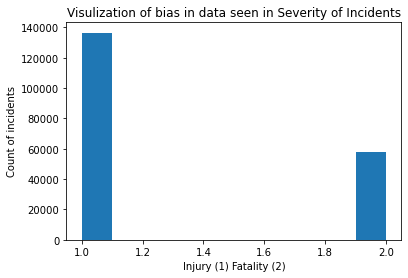

In [10]:
# check for data bias
count, bin_edges = np.histogram(df_data_1["SEVERITYCODE"],1)
df_data_1["SEVERITYCODE"].plot(kind = 'hist')
plt.title('Visulization of bias in data seen in Severity of Incidents')
plt.xlabel('Injury (1) Fatality (2)')
plt.ylabel('Count of incidents')

plt.show()

In [11]:
df_data_1.shape

(194673, 38)

In [12]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [13]:
df_data_1.INCDATE.min() # start date of data

'2004/01/01 00:00:00+00'

In [14]:
df_data_1.INCDATE.max() # end date of data

'2020/05/20 00:00:00+00'

In [15]:
df_data_1.SPEEDING.unique() # check for NaN in SPEEDING

array([nan, 'Y'], dtype=object)

In [16]:
# target with feature list, dropping LOCATION as string type data
df_data_2 = df_data_1[['SEVERITYCODE','ROADCOND','LIGHTCOND','WEATHER','SPEEDING','JUNCTIONTYPE','PERSONCOUNT','VEHCOUNT']]
df_data_2.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,SPEEDING,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT
0,2,Wet,Daylight,Overcast,NaN,At Intersection (intersection related),2,2
1,1,Wet,Dark - Street Lights On,Raining,NaN,Mid-Block (not related to intersection),2,2
2,1,Dry,Daylight,Overcast,NaN,Mid-Block (not related to intersection),4,3
3,1,Dry,Daylight,Clear,NaN,Mid-Block (not related to intersection),3,3
4,2,Wet,Daylight,Raining,NaN,At Intersection (intersection related),2,2


In [17]:
df_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  194673 non-null  int64 
 1   ROADCOND      189661 non-null  object
 2   LIGHTCOND     189503 non-null  object
 3   WEATHER       189592 non-null  object
 4   SPEEDING      9333 non-null    object
 5   JUNCTIONTYPE  188344 non-null  object
 6   PERSONCOUNT   194673 non-null  int64 
 7   VEHCOUNT      194673 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 11.9+ MB


In [18]:
df_data_2.describe(include = "all")

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,SPEEDING,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT
count,194673.000000,189661,189503,189592,9333,188344,194673.000000,194673.000000
unique,NaN,9,9,11,1,7,NaN,NaN
top,NaN,Dry,Daylight,Clear,Y,Mid-Block (not related to intersection),NaN,NaN
freq,NaN,124510,116137,111135,9333,89800,NaN,NaN
mean,1.298901,NaN,NaN,NaN,NaN,NaN,2.444427,1.920780
std,0.457778,NaN,NaN,NaN,NaN,NaN,1.345929,0.631047
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,1.000000,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,2.000000,2.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000


In [19]:
df_data_2["SPEEDING"].isnull().value_counts()

True     185340
False      9333
Name: SPEEDING, dtype: int64

In [20]:
df_data_2.SEVERITYCODE.value_counts() 

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [21]:
df_data_2['SEVERITYCODE'].isnull().value_counts()

False    194673
Name: SEVERITYCODE, dtype: int64

In [22]:
df_data_2 = pd.get_dummies(df_data_2, columns = ["SPEEDING"]) # filling missing data in SPEEDING

In [23]:
df_data_2.SPEEDING_Y.value_counts()

0    185340
1      9333
Name: SPEEDING_Y, dtype: int64

In [24]:
df_data_2.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SPEEDING_Y
0,2,Wet,Daylight,Overcast,At Intersection (intersection related),2,2,0
1,1,Wet,Dark - Street Lights On,Raining,Mid-Block (not related to intersection),2,2,0
2,1,Dry,Daylight,Overcast,Mid-Block (not related to intersection),4,3,0
3,1,Dry,Daylight,Clear,Mid-Block (not related to intersection),3,3,0
4,2,Wet,Daylight,Raining,At Intersection (intersection related),2,2,0


In [25]:
df_data_2.info() # some columns are object types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   SEVERITYCODE  194673 non-null  int64 
 1   ROADCOND      189661 non-null  object
 2   LIGHTCOND     189503 non-null  object
 3   WEATHER       189592 non-null  object
 4   JUNCTIONTYPE  188344 non-null  object
 5   PERSONCOUNT   194673 non-null  int64 
 6   VEHCOUNT      194673 non-null  int64 
 7   SPEEDING_Y    194673 non-null  uint8 
dtypes: int64(3), object(4), uint8(1)
memory usage: 10.6+ MB


In [26]:
df_data_2["SPEEDING_Y"] = df_data_2["SPEEDING_Y"].astype("int") # changing SPEEDING_Y to int type

In [27]:
df_data_2.dropna(subset=["ROADCOND","LIGHTCOND","WEATHER","JUNCTIONTYPE"], axis=0, inplace=True) # deleting NaN from feature shortlist atributes

In [28]:
df_data_2.reset_index # resetting index after changing table
df_data_2.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SPEEDING_Y
0,2,Wet,Daylight,Overcast,At Intersection (intersection related),2,2,0
1,1,Wet,Dark - Street Lights On,Raining,Mid-Block (not related to intersection),2,2,0
2,1,Dry,Daylight,Overcast,Mid-Block (not related to intersection),4,3,0
3,1,Dry,Daylight,Clear,Mid-Block (not related to intersection),3,3,0
4,2,Wet,Daylight,Raining,At Intersection (intersection related),2,2,0


In [29]:
df_data_2.shape

(183196, 8)

In [30]:
from sklearn.utils import resample 

In [31]:
df_data_2.SEVERITYCODE.value_counts()

1    126527
2     56669
Name: SEVERITYCODE, dtype: int64

In [32]:
# upsampling minority data to reduce bais from the data
df_majority = df_data_2[df_data_2.SEVERITYCODE==1]
df_minority = df_data_2[df_data_2.SEVERITYCODE==2]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=126527,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.SEVERITYCODE.value_counts()

2    126527
1    126527
Name: SEVERITYCODE, dtype: int64

In [33]:
df_upsampled.shape

(253054, 8)

In [34]:
df_data_3 = df_upsampled.copy()
df_data_3.shape

(253054, 8)

In [35]:
# LabelEncoding categorical values to int for model processing

df_data_3['JUNCTIONTYPE'] = df_data_3['JUNCTIONTYPE'].map({'Mid-Block (not related to intersection)':0,'At Intersection (intersection related)':1,'Mid-Block (but intersection related)':2,'Driveway Junction':3,
                                                           'At Intersection (but not related to intersection)':3,'Ramp Junction':3,'Unknown':3})
df_data_3.JUNCTIONTYPE.value_counts(dropna=False)

0    110051
1     94241
2     31235
3     17527
Name: JUNCTIONTYPE, dtype: int64

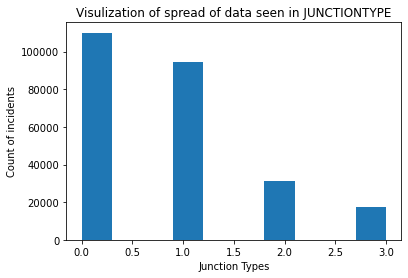

In [38]:
# check for data spread

count, bin_edges = np.histogram(df_data_3["JUNCTIONTYPE"],1)
df_data_3["JUNCTIONTYPE"].plot(kind = 'hist')
plt.title('Visulization of spread of data seen in JUNCTIONTYPE')
plt.xlabel('Junction Types')
plt.ylabel('Count of incidents')

plt.show()

In [39]:
# LabelEncoding categorical values to int for model processing

df_data_3['WEATHER'] = df_data_3['WEATHER'].map({'Clear':0,'Raining':1,'Overcast':2,'Unknown':3,
                                                           'Snowing':3,'Other':3,'Fog/Smog/Smoke':3,'Sleet/Hail/Freezing Rain':3,'Blowing Sand/Dirt':3,'Severe Crosswind':3,'Partly Cloudy':3})
df_data_3.WEATHER.value_counts(dropna=False)

0    152690
1     46681
2     37860
3     15823
Name: WEATHER, dtype: int64

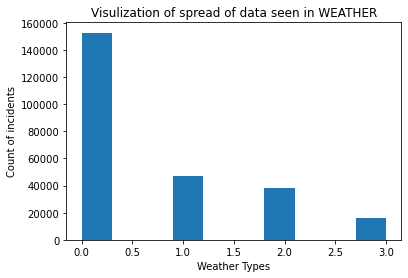

In [41]:
# check for data spread

count, bin_edges = np.histogram(df_data_3["WEATHER"],1)
df_data_3["WEATHER"].plot(kind = 'hist')
plt.title('Visulization of spread of data seen in WEATHER')
plt.xlabel('Weather Types')
plt.ylabel('Count of incidents')

plt.show()

In [42]:
# LabelEncoding categorical values to int for model processing

df_data_3['LIGHTCOND'] = df_data_3['LIGHTCOND'].map({'Daylight':0,'Dark - Street Lights On':1,'Unknown':2,'Dusk':3,
                                                           'Dawn':3,'Dark - No Street Lights':3,'Dark - Street Lights Off':3,'Other':3,'Dark - Unknown Lighting':3,})
df_data_3.LIGHTCOND.value_counts(dropna=False)

0    160927
1     65474
3     15389
2     11264
Name: LIGHTCOND, dtype: int64

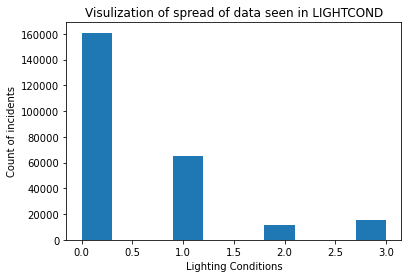

In [43]:
# check for data spread

count, bin_edges = np.histogram(df_data_3["LIGHTCOND"],1)
df_data_3["LIGHTCOND"].plot(kind = 'hist')
plt.title('Visulization of spread of data seen in LIGHTCOND')
plt.xlabel('Lighting Conditions')
plt.ylabel('Count of incidents')

plt.show()

In [44]:
# LabelEncoding categorical values to int for model processing

df_data_3['ROADCOND'] = df_data_3['ROADCOND'].map({'Dry':0,'Wet':1,'Unknown':2,'Ice':3,
                                                           'Snow/Slush':3,'Other':3,'Standing Water':3,'Sand/Mud/Dirt':3,'Oil':3})
df_data_3.ROADCOND.value_counts(dropna=False)

0    170996
1     66313
2     12500
3      3245
Name: ROADCOND, dtype: int64

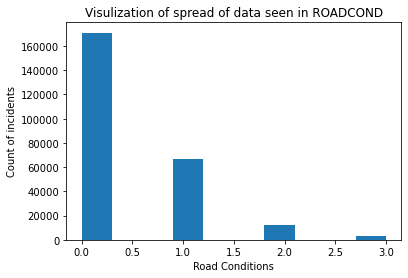

In [45]:
# check for data spread

count, bin_edges = np.histogram(df_data_3["ROADCOND"],1)
df_data_3["ROADCOND"].plot(kind = 'hist')
plt.title('Visulization of spread of data seen in ROADCOND')
plt.xlabel('Road Conditions')
plt.ylabel('Count of incidents')

plt.show()

In [46]:
df_data_3.head()

,SEVERITYCODE,ROADCOND,LIGHTCOND,WEATHER,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SPEEDING_Y
1,1,1,1,1,0,2,2,0
2,1,0,0,2,0,4,3,0
3,1,0,0,0,0,3,3,0
5,1,0,0,0,1,2,2,0
6,1,1,0,1,1,2,2,0


In [47]:
df_data_3.shape

(253054, 8)

In [48]:
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253054 entries, 1 to 6304
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype
---  ------        --------------   -----
 0   SEVERITYCODE  253054 non-null  int64
 1   ROADCOND      253054 non-null  int64
 2   LIGHTCOND     253054 non-null  int64
 3   WEATHER       253054 non-null  int64
 4   JUNCTIONTYPE  253054 non-null  int64
 5   PERSONCOUNT   253054 non-null  int64
 6   VEHCOUNT      253054 non-null  int64
 7   SPEEDING_Y    253054 non-null  int64
dtypes: int64(8)
memory usage: 17.4 MB


In [49]:
# creating feature set of independent variables
X = df_data_3.drop(['SEVERITYCODE'], axis=1)
X[:5]

,ROADCOND,LIGHTCOND,WEATHER,JUNCTIONTYPE,PERSONCOUNT,VEHCOUNT,SPEEDING_Y
1,1,1,1,0,2,2,0
2,0,0,2,0,4,3,0
3,0,0,0,0,3,3,0
5,0,0,0,1,2,2,0
6,1,0,1,1,2,2,0


In [50]:
# depedent target variable

y = df_data_3["SEVERITYCODE"]
y.head()

1    1
2    1
3    1
5    1
6    1
Name: SEVERITYCODE, dtype: int64

In [51]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


array([[ 0.93177718,  0.56032362,  0.34745717, -0.92154434, -0.37717628,
         0.07633447, -0.23882769],
       [-0.61941121, -0.63235951,  1.40445642, -0.92154434,  0.99645333,
         1.72988215, -0.23882769],
       [-0.61941121, -0.63235951, -0.70954209, -0.92154434,  0.30963852,
         1.72988215, -0.23882769],
       [-0.61941121, -0.63235951, -0.70954209,  0.19269071, -0.37717628,
         0.07633447, -0.23882769],
       [ 0.93177718, -0.63235951,  0.34745717,  0.19269071, -0.37717628,
         0.07633447, -0.23882769]])

In [52]:
# train test split with 20% data for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)
print ('Train set', X_train.shape, y_train.shape)
print ('Test set', X_test.shape, y_test.shape)

Train set (202443, 7) (202443,)
Test set (50611, 7) (50611,)


In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import log_loss

In [54]:
# Logistic Regression model being used for this exercise
LR_test = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR_test

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
yhat_test = LR_test.predict(X_test)
yhat_test

array([1, 1, 2, ..., 2, 1, 2])

In [56]:
yhat_test_prob = LR_test.predict_proba(X_test)
yhat_test_prob

array([[0.54814072, 0.45185928],
       [0.53641316, 0.46358684],
       [0.44354281, 0.55645719],
       ...,
       [0.46376022, 0.53623978],
       [0.55331476, 0.44668524],
       [0.49840962, 0.50159038]])

In [57]:
# jaccard similarity score check for accuracy

from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score (y_test, yhat_test)

0.6198652466855031

In [58]:
# confusion matrix

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion Matrix',
                         cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype(float)/ cm.sum(axis=1)[:np.newaxis]
        print ("Normalized Confusion Matrix")
    else:
        print ("Confusion Matrix, without Normalization")
    print (cm)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel ('True Label')
    plt.xlabel ('Predicted Label')
print(confusion_matrix(y_test, yhat_test, labels=[1,0]))

[[15395     0]
 [    0     0]]


Confusion Matrix, without Normalization
[[15395     0]
 [    0     0]]


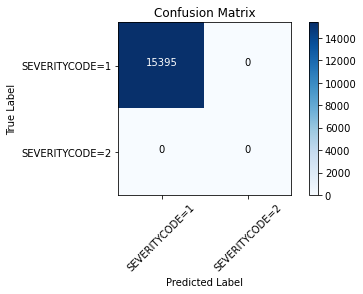

In [59]:
cnf_matrix = confusion_matrix(y_test, yhat_test, labels=[1,0])
np.set_printoptions(precision = 2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes= ['SEVERITYCODE=1','SEVERITYCODE=2'], normalize = False, title = 'Confusion Matrix')

In [60]:
# classification report to check for avg F1 scores

print(classification_report (y_test, yhat_test))

              precision    recall  f1-score   support

           1       0.63      0.60      0.62     25455
           2       0.61      0.64      0.62     25156

   micro avg       0.62      0.62      0.62     50611
   macro avg       0.62      0.62      0.62     50611
weighted avg       0.62      0.62      0.62     50611



In [61]:
# log loss check for probability accuracy
log_loss(y_test, yhat_test_prob)

0.6582267674604882